# Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# Loading Data

In [24]:
data=pd.read_csv("AML.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [25]:
data.isna().sum().sum()

0

In [26]:
data["type"].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


Possible Red Flags:


*   Very high amountin a single transaction and large volumes of transactions
*   Multiple accounts with a single targeted beneficiary







In [ ]:
print(data["amount"].max())
print(data["amount"].min())

92445516.64
0.0


In [ ]:
ML_df=data.loc[data["isFraud"]==1]
NoML_df=data.loc[data["isFraud"]==0]

In [ ]:
print("Total transaction amount: ",len(data["isFraud"]))


Total transaction amount:  6362620


In [ ]:
len(NoML_df)

6354407

In [ ]:
len(ML_df)

8213

In [ ]:
(len(ML_df)/len(data["isFraud"]))*100

0.12908204481801522

In [ ]:
(len(NoML_df)/len(data["isFraud"]))*100

99.87091795518198

# Data Visualization

<Axes: xlabel='type', ylabel='count'>

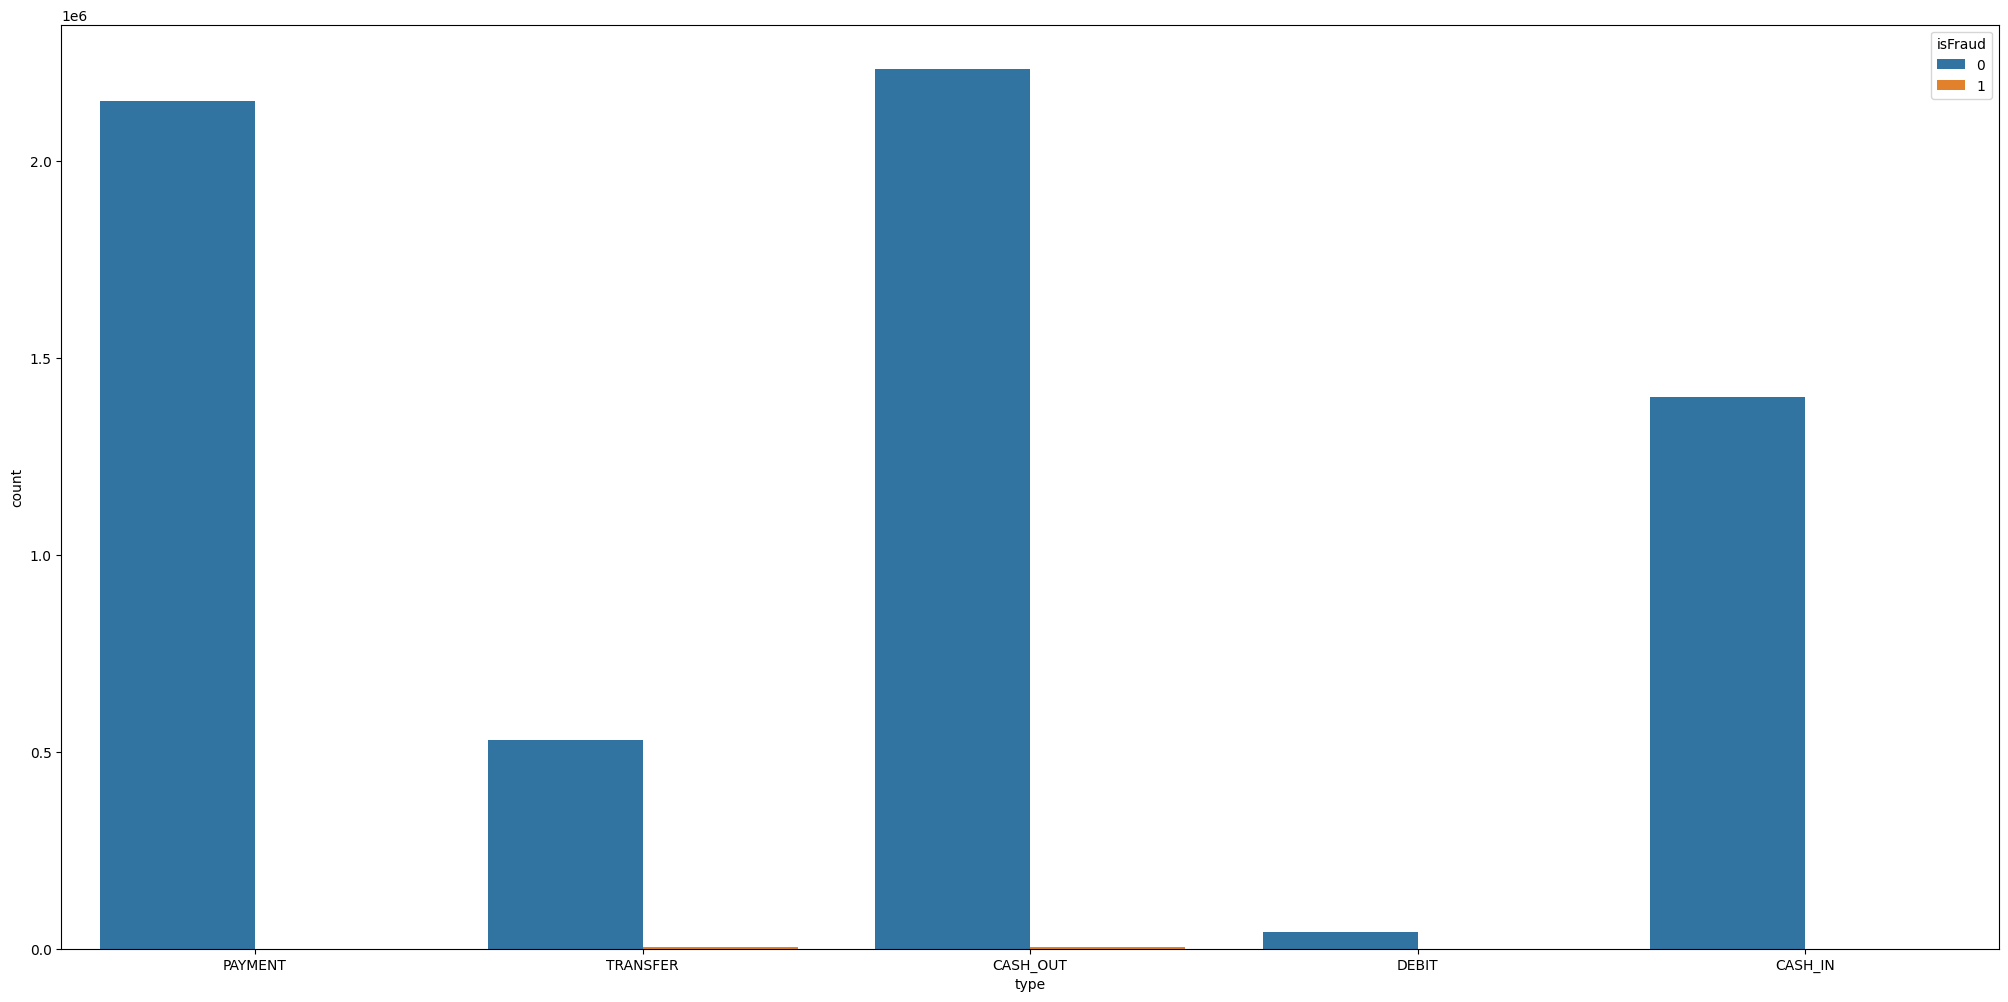

In [ ]:
plt.figure(figsize=[25,12])
sns.countplot(x="type",hue="isFraud",data=data)

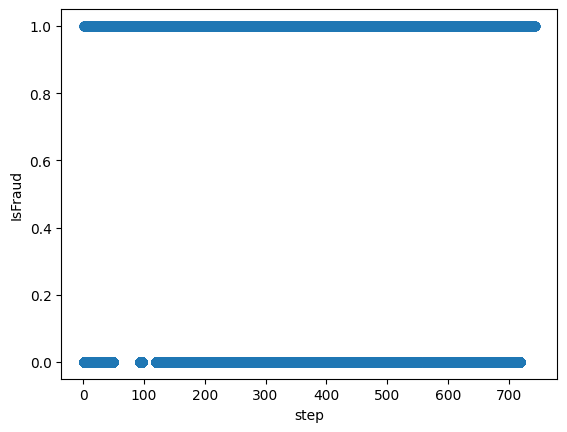

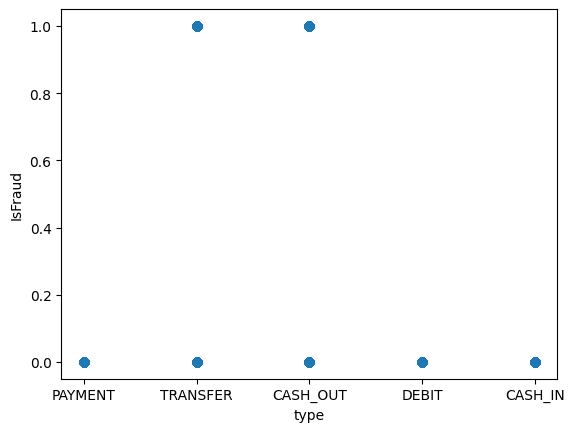

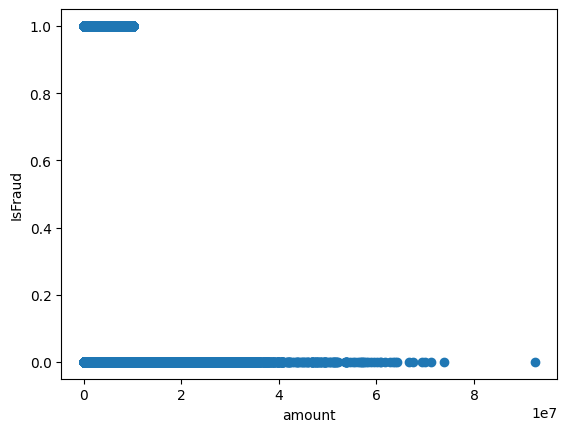

In [ ]:
for label in data.columns[:3]:
  plt.scatter(data[label],data["isFraud"])
  plt.xlabel(label)
  plt.ylabel("IsFraud")
  plt.show()


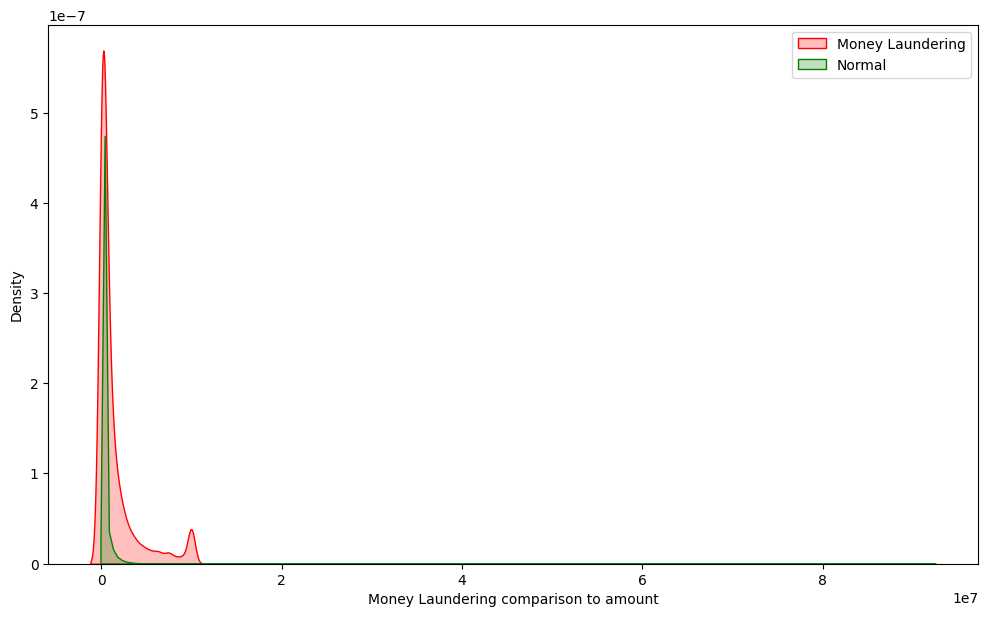

In [ ]:
#KDE - Kernel Density Estimate to determine the probability density of a continuous variable
plt.figure(figsize=[12,7])
sns.kdeplot(ML_df["amount"],label="Money Laundering",fill=True,color='r')
sns.kdeplot(NoML_df["amount"],label="Normal",fill =True, color='g')
plt.xlabel("Money Laundering comparison to amount")
plt.legend()

<Axes: >

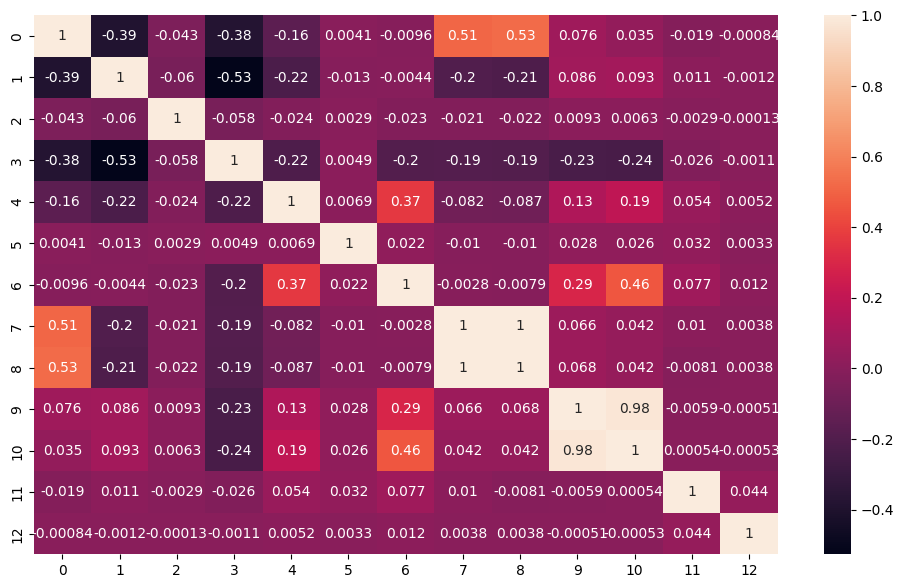

In [ ]:
plt.figure(figsize=[12,7])
correlation=data.corr()
sns.heatmap(correlation,annot=True)

# Data Preprocessing

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Define numerical columns and categorical column
num_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
cat_col = "type"

# Standardize numerical columns
sc = StandardScaler()
data[num_cols] = sc.fit_transform(data[num_cols])

# One-Hot Encode the 'type' column
ohe = OneHotEncoder(drop='first', sparse_output=False)
type_encoded = ohe.fit_transform(data[[cat_col]])

# Create a DataFrame for the one-hot encoded features
type_encoded_df = pd.DataFrame(type_encoded, columns=ohe.get_feature_names_out([cat_col]))

# Concatenate the encoded columns back to the original dataframe, dropping the original 'type' column
data = pd.concat([data.reset_index(drop=True), type_encoded_df], axis=1).drop(cat_col, axis=1)

# Display the first few rows
data.head()


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0,0.0,0.0,1.0,0.0
1,1,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0,0.0,0.0,1.0,0.0
2,1,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0,0.0,0.0,0.0,1.0
3,1,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0,1.0,0.0,0.0,0.0
4,1,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0,0.0,0.0,1.0,0.0


In [28]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


In [29]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0.0,0.0,1.0,0.0
1,1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0.0,0.0,1.0,0.0
2,1,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,0.0,0.0,0.0,1.0
3,1,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,1.0,0.0,0.0,0.0
4,1,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0.0,0.0,1.0,0.0


In [30]:
X=data.drop(columns=["isFraud"])
y=data["isFraud"]

In [31]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [32]:
y.isnull().sum()

0

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)


(5090096, 11)
(1272524, 11)


In [35]:
print(y_train.shape)
print(y_test.shape)

(5090096,)
(1272524,)


In [36]:
data["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [38]:
from collections import Counter

# Verify the new distribution of classes
print(f"Original training set class distribution: {Counter(y_train)}")
print(f"Resampled training set class distribution: {Counter(y_train_resampled)}")


Original training set class distribution: Counter({0: 5083503, 1: 6593})
Resampled training set class distribution: Counter({0: 5083503, 1: 5083503})


# Model Development

## DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the resampled training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9991269319871374

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.60      0.98      0.74      1620

    accuracy                           1.00   1272524
   macro avg       0.80      0.99      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:
 [[1269828    1076]
 [     35    1585]]


In [40]:
import joblib

# Save the Decision Tree model to a file
joblib.dump(dt_classifier, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [42]:
import joblib
import os

# Create the directory in Google Drive
directory = '/content/drive/My Drive/AML_rf_model'
os.makedirs(directory, exist_ok=True)

# Save the Decision Tree model
model_filename = os.path.join(directory, 'decision_tree_model.joblib')
joblib.dump(dt_classifier, model_filename)


['/content/drive/My Drive/AML_rf_model/decision_tree_model.joblib']

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


KeyboardInterrupt: 

# XAi

## DT Shap

In [44]:
pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.6 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a7adf2f82e694ce7befed4aa62de2cd5444950ae75841de10220ff5d7200c148
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import shap

# Create a TreeExplainer for the random forest model
explainer = shap.TreeExplainer(dt_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize a summary plot for the feature importance
shap.summary_plot(shap_values[1], X_test, plot_type="bar")  # '1' corresponds to the positive class (fraud)
# Plot SHAP values for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])
# Plot SHAP values for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[2])


In [ ]:
# Plot SHAP values for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[2])


## DT LIME

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
lime_explainer = LimeTabularExplainer(
    X_train_resampled.values,
    feature_names=X.columns,
    class_names=['Not Fraud', 'Fraud'],
    discretize_continuous=True
)

# Choose an instance from the test set to explain
i = 0  # Non Fraud
explanation = lime_explainer.explain_instance(
    X_test.values[i],
    dt_classifier.predict_proba,
    num_features=10
)

# Display the explanation
explanation.show_in_notebook()


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
lime_explainer = LimeTabularExplainer(
    X_train_resampled.values,
    feature_names=X.columns,
    class_names=['Not Fraud', 'Fraud'],
    discretize_continuous=True
)

# Choose an instance from the test set to explain
i = 2  # Fraud
explanation = lime_explainer.explain_instance(
    X_test.values[i],
    dt_classifier.predict_proba,
    num_features=10
)

# Display the explanation
explanation.show_in_notebook()


## RF Shap

In [ ]:
import shap

# Create a TreeExplainer for the random forest model
explainer = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize a summary plot for the feature importance
shap.summary_plot(shap_values[1], X_test, plot_type="bar")  # '1' corresponds to the positive class (fraud)


In [ ]:
# Plot SHAP values for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])


In [ ]:
# Plot SHAP values for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[2])


## RF Lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
lime_explainer = LimeTabularExplainer(
    X_train_resampled.values,
    feature_names=X.columns,
    class_names=['Not Fraud', 'Fraud'],
    discretize_continuous=True
)

# Choose an instance from the test set to explain
i = 0
explanation = lime_explainer.explain_instance(
    X_test.values[i],
    rf_classifier.predict_proba,
    num_features=10
)

# Display the explanation
explanation.show_in_notebook()


In [ ]:
# Choose an instance from the test set to explain
i = 2
explanation = lime_explainer.explain_instance(
    X_test.values[i],
    rf_classifier.predict_proba,
    num_features=10
)

# Display the explanation
explanation.show_in_notebook(